In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from google.colab import drive
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
245,246,Male,30,297,69
246,247,Female,56,311,14
247,248,Male,29,313,90
248,249,Female,19,316,32


In [ ]:
data.shape

(250, 5)

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


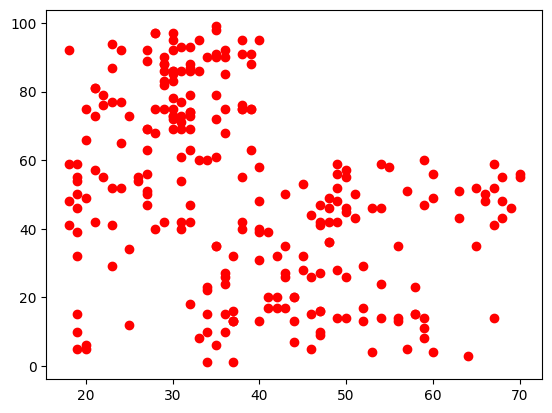

In [ ]:
plt.scatter(data['Age'],data['Spending Score (1-100)'],color='red')

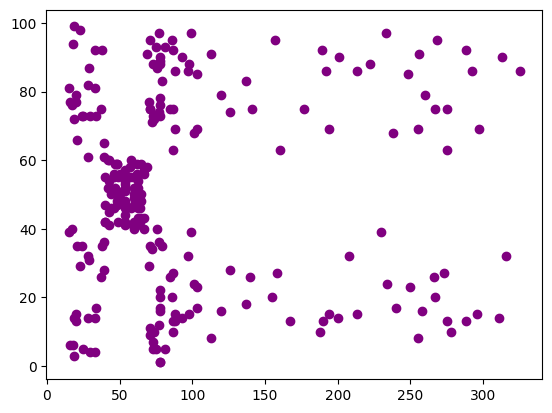

In [ ]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],color='purple')

In [ ]:
X=data[['Gender','Annual Income (k$)','Age']]
X['Gender']=pd.get_dummies(X['Gender'],drop_first=True)
print(X)

     Gender  Annual Income (k$)  Age
0         1                  15   19
1         1                  15   21
2         0                  16   20
3         0                  16   23
4         0                  17   31
..      ...                 ...  ...
245       1                 297   30
246       0                 311   56
247       1                 313   29
248       0                 316   19
249       0                 325   31

[250 rows x 3 columns]


In [ ]:
score=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(X)
    score.append(model.inertia_)
score

[1531436.7920000004,
 297809.3698432343,
 191972.6307819964,
 119371.83354418319,
 92491.04672936258,
 70931.19717644058,
 59594.340184537694,
 49695.17798974364,
 42299.54088020469]

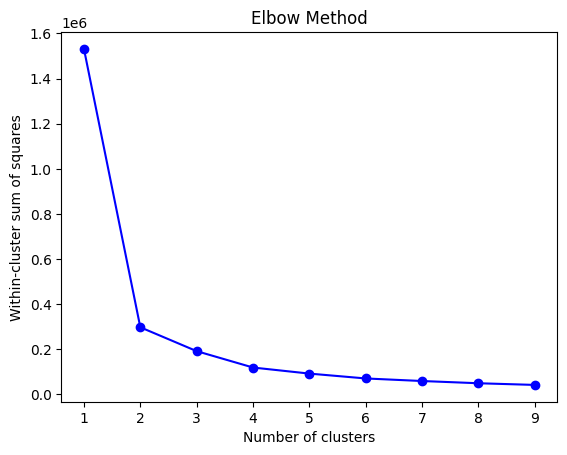

In [ ]:
plt.plot(range(1,10),score,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method')
plt.show()

In [ ]:
data['Gender']=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
kmean= KMeans(n_clusters=5,init = 'k-means++', max_iter = 300, n_init = 10)
y_pred=kmean.fit_predict(data.drop(['CustomerID'],axis=1))
data['cluster']=y_pred
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
245,246,1,30,297,69,0
246,247,0,56,311,14,0
247,248,1,29,313,90,0
248,249,0,19,316,32,0


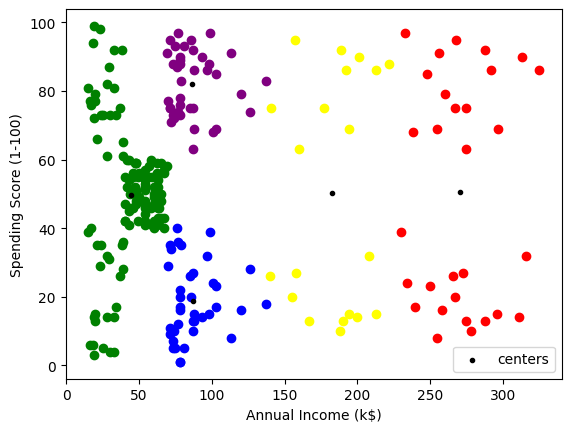

In [ ]:
data['cluster']=y_pred
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]
df4=data[data.cluster==3]
df5=data[data.cluster==4]

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='red')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='green')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='yellow')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='blue')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='purple')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.scatter(kmean.cluster_centers_[:,2],kmean.cluster_centers_[:,3],color='black',marker='.',label='centers')

plt.legend()

In [ ]:
kmean.cluster_centers_

array([[  0.53333333,  37.33333333, 270.9       ,  50.56666667],
       [  0.40650407,  40.32520325,  44.15447154,  49.82926829],
       [  0.45      ,  36.65      , 182.95      ,  50.2       ],
       [  0.52631579,  40.39473684,  87.        ,  18.63157895],
       [  0.46153846,  32.69230769,  86.53846154,  82.12820513]])

In [ ]:
"""
Silhouette evaluation is a method of evaluating the performance of a clustering algorithm. 
It is based on the concept of calculating the similarity between data points within
a cluster and the similarity between data points in different clusters.
The silhouette score is calculated by taking the mean intra-cluster distance (a) 
and subtracting it from the mean nearest-cluster distance (b).
The result is then divided by the maximum of these two values.
A higher silhouette score indicates that the clustering algorithm has done a better 
job of grouping similar data points together.
"""
#silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming you have a dataset 'X' and the desired number of clusters 'n_clusters'

# Instantiate the K-means clustering algorithm
kmeans = KMeans(n_clusters=5)

# Fit the K-means model to the data
kmeans.fit(data)

# Obtain the predicted cluster labels for each sample
labels = kmeans.labels_

# Compute the silhouette scores for each sample
silhouette_values = silhouette_samples(data, labels)

# Calculate the mean silhouette coefficient for all samples
average_silhouette_score = silhouette_score(data, labels)

# Print the silhouette score for each sample
for i, silhouette in enumerate(silhouette_values):
    print(f"Sample {i}: Silhouette score = {silhouette}")

# Print the average silhouette coefficient
print(f"Average Silhouette Score: {average_silhouette_score}")

Sample 0: Silhouette score = 0.5169113885304002
Sample 1: Silhouette score = 0.4992959637264199
Sample 2: Silhouette score = 0.4370827668770866
Sample 3: Silhouette score = 0.5163355157661105
Sample 4: Silhouette score = 0.543620547356524
Sample 5: Silhouette score = 0.5204770998234436
Sample 6: Silhouette score = 0.4549847476976079
Sample 7: Silhouette score = 0.46057838532192524
Sample 8: Silhouette score = 0.40923984491213455
Sample 9: Silhouette score = 0.5405890931928615
Sample 10: Silhouette score = 0.4343940312362092
Sample 11: Silhouette score = 0.43841599179723556
Sample 12: Silhouette score = 0.46418522098133697
Sample 13: Silhouette score = 0.5262189305940698
Sample 14: Silhouette score = 0.48061289255132206
Sample 15: Silhouette score = 0.5157557255266034
Sample 16: Silhouette score = 0.5479754748412942
Sample 17: Silhouette score = 0.537822633417993
Sample 18: Silhouette score = 0.5138430457036965
Sample 19: Silhouette score = 0.4297481035396558
Sample 20: Silhouette score

In [37]:
"""
Cohesion evaluation in cluster analysis is a measure of how closely related the data points within a cluster are. 
It is used to assess the quality of a clustering algorithm's output. Cohesion measures
 the average similarity between all pairs of data points within a cluster, 
and is usually calculated as the sum of all pairwise similarities divided by the number of pairs. 
A higher cohesion score indicates that the data points within a cluster are more similar 
to each other than those in other clusters.
"""
#cohesion
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Assuming you have a dataset 'X' and the desired number of clusters 'n_clusters'

# Instantiate the K-means clustering algorithm
kmeans = KMeans(n_clusters=5)

# Fit the K-means model to the data
kmeans.fit(data)

# Obtain the predicted cluster labels for each sample
labels = kmeans.labels_

# Compute the pairwise distance matrix between samples
distance_matrix = pairwise_distances(data)

# Compute the cohesion for each cluster
unique_labels = np.unique(labels)
cohesion_scores = []

for label in unique_labels:
    # Select the samples belonging to the current cluster
    cluster_samples = data[labels == label]
    
    # Compute the mean intra-cluster distance (cohesion)
    cohesion = np.mean(distance_matrix[labels == label][:, labels == label])
    cohesion_scores.append(cohesion)

# Calculate the average cohesion score
average_cohesion = np.mean(cohesion_scores)

# Print the cohesion score for each cluster
for i, label in enumerate(unique_labels):
    print(f"Cluster {label}: Cohesion = {cohesion_scores[i]}")

# Print the average cohesion score
print(f"Average Cohesion: {average_cohesion}")

Cluster 0: Cohesion = 53.32792081240129
Cluster 1: Cohesion = 47.74132800154713
Cluster 2: Cohesion = 54.531527500285044
Cluster 3: Cohesion = 37.29191194432952
Cluster 4: Cohesion = 55.191367999707104
Average Cohesion: 49.61681125165401


In [38]:
"""
Separation evaluation in cluster analysis is a measure of how well the clusters are separated from each other. 
It is used to assess the quality of a clustering solution and can be used to
 compare different clustering algorithms or different parameter settings for the same algorithm.
 Separation evaluation measures the distance between clusters, and can be
   based on either inter-cluster or intra-cluster distances.
"""
#separation
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Assuming you have a dataset 'X' and the desired number of clusters 'n_clusters'

# Instantiate the K-means clustering algorithm
kmeans = KMeans(n_clusters=5)

# Fit the K-means model to the data
kmeans.fit(data)

# Obtain the predicted cluster labels for each sample
labels = kmeans.labels_

# Compute the pairwise distance matrix between samples
distance_matrix = pairwise_distances(data)

# Compute the separation for each cluster
unique_labels = np.unique(labels)
separation_scores = []

for label in unique_labels:
    # Select the samples belonging to the current cluster
    cluster_samples = data[labels == label]
    
    # Compute the mean inter-cluster distance (separation)
    separation = np.mean(distance_matrix[labels == label][:, labels != label])
    separation_scores.append(separation)

# Calculate the average separation score
average_separation = np.mean(separation_scores)

# Print the separation score for each cluster
for i, label in enumerate(unique_labels):
    print(f"Cluster {label}: Separation = {separation_scores[i]}")

# Print the average separation score
print(f"Average Separation: {average_separation}")

Cluster 0: Separation = 121.13151896559027
Cluster 1: Separation = 242.8635298536103
Cluster 2: Separation = 162.68309957242394
Cluster 3: Separation = 130.7408345825819
Cluster 4: Separation = 163.37298271315265
Average Separation: 164.15839313747182


In [ ]:
"""
Rand index evaluation is a measure of the similarity between two data clusterings. 
It is a statistic used to measure the similarity between two sets of data, and ranges from 0 to 1,
 with 1 indicating perfect agreement.
 The Rand index takes into account both the agreement of pairs 
 that are assigned in the same cluster and those that are assigned in different clusters.
 It is commonly used in machine learning and data mining to evaluate the accuracy of clustering algorithms.
"""
#Rand_index
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

# Assuming you have a dataset 'X', the true class labels 'true_labels', and the desired number of clusters 'n_clusters'

# Instantiate the K-means clustering algorithm
kmeans = KMeans(n_clusters=5)

# Fit the K-means model to the data
kmeans.fit(data)

# Obtain the predicted cluster labels for each sample
predicted_labels = kmeans.labels_

# Calculate the Rand Index
rand_index = adjusted_rand_score(y_pred, predicted_labels)

# Print the Rand Index
print(f"Rand Index: {rand_index}")

Rand Index: 0.5260364219785271


In [ ]:
"""
The Dunn index is a measure of the clustering quality of a given partitioning of a data set.
 It is calculated by taking the ratio of the minimum inter-cluster distance to the maximum intra-cluster distance.
 The higher the value, the better the clustering quality.
"""
#dunn Index
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

def dunn_index(df, y_pred):
    """
    Compute the Dunn index for k-means clustering.
    
    Args:
        X (numpy array): Input data matrix of shape (n_samples, n_features).
        labels (numpy array): Cluster labels assigned by the k-means algorithm.
        
    Returns:
        dunn_index (float): Dunn index value.
    """
    # Calculate pairwise distances between data points
    distances = pairwise_distances(df)
    
    # Calculate minimum inter-cluster distance
    min_intercluster_dist = np.inf
    for i in np.unique(y_pred):
        for j in np.unique(y_pred):
            if i != j:
                mask_i = y_pred == i
                mask_j = y_pred == j
                dist = np.min(distances[mask_i][:, mask_j])
                if dist < min_intercluster_dist:
                    min_intercluster_dist = dist
    
    # Calculate maximum intra-cluster diameter
    max_intracluster_diam = 0.0
    for i in np.unique(y_pred):
        mask_i = labels == i
        cluster_diam = np.max(distances[mask_i][:, mask_i])
        if cluster_diam > max_intracluster_diam:
            max_intracluster_diam = cluster_diam
    
    # Calculate Dunn index
    dunn_index = min_intercluster_dist / max_intracluster_diam
    
    return dunn_index

# Example usage:
# Assuming you have your data in a numpy array X and labels assigned by k-means in a numpy array 'labels'
dunn_index_value = dunn_index(data, y_pred)
print (dunn_index_value)


0.08169789678705622


In [ ]:
"""
F-measure is a measure of a test's accuracy that combines precision and recall.
 It is calculated by taking the harmonic mean of precision and recall,
  where precision is the number of true positives divided by the sum of true positives and false positives,
   and recall is the number of true positives divided by the sum of true positives and false negatives.
    F-measure is often used in information retrieval tasks such as text classification,
 where it can be used to evaluate how well a model can classify documents into different categories.
"""
#F-Measure
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import numpy as np 

#defining the true labels and predicted labels 
true_labels = data['cluster']
predicted_labels = predicted_labels
  
#calculating the F-measure using precision_recall_fscore_support() function 
precision, recall, fscore, support = precision_recall_fscore_support(true_labels , predicted_labels) 
  
#calculating the confusion matrix using confusion matrix() function 
cm = confusion_matrix(true_labels , predicted_labels) 

   #calculating the F-measure from the confusion matrix  
Fmeasure = (2*cm[0][0]) / (2*cm[0][0] + cm[1][0] + cm[0][1]) 

   #printing the F-measure value calculated from both methods  
print("F-measure calculated using precision recall fscore support function : ", fscore[0]) 
print("F-measure calculated using confusion matrix : ", Fmeasure)


F-measure calculated using precision recall fscore support function :  0.9836065573770492
F-measure calculated using confusion matrix :  1.0


In [ ]:
"""
Cluster evaluation methods are techniques used to assess the quality of a clustering algorithm.
 These methods measure the degree to which clusters are internally homogeneous and externally heterogeneous.
 Common cluster evaluation metrics include the Rand Index, Adjusted Rand Index, F-measure, Silhouette Coefficient,
  Cohesion, Separation, and dunn index.
"""

'\nCluster evaluation methods are techniques used to assess the quality of a clustering algorithm.\n These methods measure the degree to which clusters are internally homogeneous and externally heterogeneous.\n Common cluster evaluation metrics include the Rand Index, Adjusted Rand Index, F-measure, Silhouette Coefficient,\n  Cohesion, Separation, and dunn index.\n'